<a href="https://colab.research.google.com/github/adnanagbaria/MLcourse/blob/main/Lec8_boosingAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting algorithms
Agenda
* Gradient Boosting: Regression concept
* Gradient Boosting: Regression Calculation
* Gradient Boosting: Classification concept
* Gradient Boosting: Calculation

# Gradient Boosting for Regression
Gradient Boosting Regression is an ensemble technique that builds a strong regressor by combining multiple weak regressors (typically decision trees), each trained to correct the errors of its predecessor.

Instead of predicting directly, each new model tries to predict the residuals (errors) of the combined previous models.

**Mathematical Form:**
Suppose you want to minimize a loss function $L(y, \hat{y})$:
1. Start with an initial model:
$F_0(x) = arg \min_{\gamma} \Sigma L(y_i, \gamma)$

2. For each iteration $m = 1, 2, ..., M$:
  * Compute pseudo-residuals:
  $r_i^m = - [\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}]_{F=F_{m-1}}$
  * Fit a weak model $h_m(x)$ to $r_i^m$
  * Compute step size $\gamma_m$
  *Update: $F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)$

**Common Loss Functions:**
* Squared Error: $L = (y - \hat{y})^2$
* Absolute Error:  $L = |y - \hat{y}|$
* Huber Loss: Mix of the above, robust to outliers

(Lec8: Slides 3 -- 23)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Create data
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit model
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
reg.fit(X_train, y_train)

# Evaluate
print("R2 Score:", reg.score(X_test, y_test))


R2 Score: 0.8863388281067902


**Advantages:**
* Handles non-linear relationships
* Customizable with loss functions
* Robust to overfitting (if tuned properly)


# Regression Calculation
Let's walk through a step-by-step numerical example of Gradient Boosting Regression using the squared error loss function.

**Dataset:**

| $x$ | $y$ |
| --- | --- |
| 1   | 2   |
| 2   | 3   |
| 3   | 2.5 |

**Step 1: Initial Prediction $F_0(x)$**
For squared error, initial prediction is usually the mean of $y$:
$F_0(x) =\bar{y} = \frac{2+3+2.5}{3} = 2.5$

**Step 2: Compute Residuals (Negative Gradient)**

$r_i = y_i - F_0(x_i)$

| $x$ | $y$ | $F_0(x)$   | Residual $r$ |
| --- | --- | ---------- | ------------ |
| 1   | 2   |   2.5      | -0.5         |
| 2   | 3   |   2.5      | 0.5          |
| 3   | 2.5 |   2.5      | 0.0          |

**Step 3: Fit a Simple Tree to Residuals**
Let’s say our weak learner is a decision stump:
* $x < 1.5 => -0.5$
* $x \ge 1.5 => 0.25$ (average of 0.5 and 0)

This is the prediction $h_1(x)$

**Step 4: Update Model**
With learning rate $\phi = 1.0$, $F_1(x) = F_0(x) + \phi h_1(x)$

| $x$ | $F_0(x)$ | $h_1(x)$ | $F_1(x)$ |
| --- | -------- | -------- | -------- |
| 1   | 2.5      | -0.5     | 2.0      |
| 2   | 2.5      | 0.25     | 2.75     |
| 3   | 2.5      | 0.25     | 2.75     |



#Gradient Boosting: Classification

##1. Introduction to Gradient Boosting
* Ensemble method that builds models sequentially.
* Each new model corrects errors made by the previous ones.
* Uses decision trees as weak learners.

##2. Difference from Bagging
* Boosting: sequential, focuses on mistakes.
* Bagging (e.g., Random Forests): parallel, reduces variance.

##3. Loss Functions in Classification
* Commonly uses log-loss (binary cross-entropy) for binary classification.
* Minimizes this differentiable loss via gradient descent.

##4. Algorithm Steps
1. Initialize with a base prediction (e.g., log(odds)).
2. For each iteration:
 * Compute the gradient (pseudo-residuals).
 * Fit a weak learner (typically a small decision tree) to these gradients
 * Update the model using a learning rate.

##5. Learning Rate and Overfitting
* Smaller learning rate = slower learning but better generalization.
* Requires more trees.

##6. Classification Example
* Use a dataset (e.g., customers liking a product).
* Show how residuals are computed.
* Show tree predictions and updates step-by-step.

##7. Final Prediction
* Sum predictions from all trees.
* Apply a sigmoid function to convert log-odds to probability.
* Classify based on a threshold (typically 0.5).

##8. Advantages
* Handles mixed data types well.
* High performance on tabular data.
* Can handle missing values.

##9. Disadvantages
* Prone to overfitting without proper tuning.
* Longer training times compared to simpler models.

#Example: Predicting Customer Churn
Predict whether a customer will churn (leave a telecom company) based on their usage and account features.

* Dataset: Telco Customer Churn
* URL: https://www.kaggle.com/datasets/abdallahwagih/telco-customer-churn

##Columns:
1. customerID - unique customer identifier
2. gender – Male, Female
3. SeniorCitizen – 0 or 1
4. Partner – Yes or No
5. Dependents – Yes or No
6. tenure – number of months with the company
7. PhoneService – Yes or No
8. MultipleLines – Yes, No, No phone service
9. InternetService – DSL, Fiber Optic, No
10. OnlineSecurity – Yes, No, No Internet Service
11. OnlineBackup – Yes, No, No Internet Service
12. DeviceProtection – Yes, No, No Internet Service
13. TechSupport – Yes, No, No Internet Service
14. StreamingTV – Yes, No, No Internet Service
15. StreamingMovies – Yes, No, No Internet Service
16. Contract – Month-to-Month, One year, Two year
17. PaperlessBilling – Yes or No
18. PaymentMethod – Electronic check, Mailed check, Bank transfer (automatic)
19. Credit card (automatic)
20. MonthlyCharges – numeric monthly charge
21. TotalCharges – numeric total charges
22. Churn – Yes or No (target variable)

#Preprocessing
1. Convert categorical features using One-Hot Encoding.
2. Convert target churn to binary: Yes = 1, No = 0.

In [1]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Telco_customer_churn.xlsx'
import pandas as pd
odf = pd.read_excel(file_path)
odf.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
odf.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [6]:
# remove the column that we will not use in our technology
df = odf.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'])
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/processed_telco_churn.csv', index=False)

In [ ]:
# Read the CSV file (if exists)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/processed_telco_churn.csv')

Convert non-numerical to columns to numerical
* gender – Male, Female -> 1: Male, 0: Femal

In [7]:
# Binary encoding
binary_cols = ['Gender', 'Partner', 'Dependents', 'Phone Service',
               'Paperless Billing', 'Churn Value']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})
df.head()

/tmp/ipython-input-3154738890.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,No,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
1,0,No,0,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
2,0,No,0,1,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.5,1
3,0,No,1,1,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
4,1,No,0,1,49,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,1


In [8]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

In [9]:
# One-hot encoding for remaining categorical columns
categorical_cols = ['Senior Citizen', 'Multiple Lines', 'Internet Service',
                    'Online Security', 'Online Backup', 'Device Protection',
                    'Tech Support', 'Streaming TV', 'Streaming Movies',
                    'Contract', 'Payment Method']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the modified DataFrame to verify the changes
df.head()

,Gender,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Senior Citizen_Yes,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,2,1,1,53.85,108.15,1,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,1,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8,1,1,99.65,820.5,1,False,...,False,False,True,False,True,False,False,False,True,False
3,0,1,1,28,1,1,104.80,3046.05,1,False,...,True,False,True,False,True,False,False,False,True,False
4,1,0,1,49,1,1,103.70,5036.3,1,False,...,False,False,True,False,True,False,False,False,False,False


In [10]:
# Check data types of columns
print(df.dtypes)

# Identify and handle non-numerical columns (if any remain)
# One potential issue is the 'Total Charges' column which might have spaces or non-numeric values
# Convert 'Total Charges' to numeric, coercing errors
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Drop rows with NaN values that resulted from coercion
df.dropna(inplace=True)

# Verify data types again
print("\nData types after handling 'Total Charges':")
print(df.dtypes)

Gender                                      int64
Partner                                     int64
Dependents                                  int64
Tenure Months                               int64
Phone Service                               int64
Paperless Billing                           int64
Monthly Charges                           float64
Total Charges                              object
Churn Value                                 int64
Senior Citizen_Yes                           bool
Multiple Lines_No phone service              bool
Multiple Lines_Yes                           bool
Internet Service_Fiber optic                 bool
Internet Service_No                          bool
Online Security_No internet service          bool
Online Security_Yes                          bool
Online Backup_No internet service            bool
Online Backup_Yes                            bool
Device Protection_No internet service        bool
Device Protection_Yes                        bool


#Gradient Boosting Steps:
* Step 1: Initialize the model with the log-odds of the churn rate.
* Step 2: Iteratively:
 - Compute pseudo-residuals (difference between actual and predicted probability).
 - Fit a shallow decision tree to predict these residuals.
 - Update the prediction by adding a fraction (learning rate × tree output).

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target (y)
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8109452736318408

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1012
           1       0.71      0.55      0.62       395

    accuracy                           0.81      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.80      0.81      0.80      1407



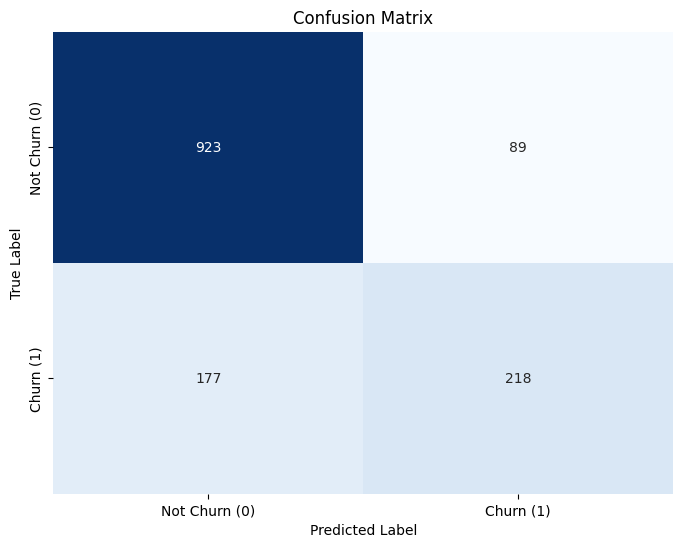

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn (0)', 'Churn (1)'],
            yticklabels=['Not Churn (0)', 'Churn (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

| Component      | Details                                                 |
| -------------- | ------------------------------------------------------- |
| **Dataset**    | Telco Customer Churn (approx. 7,043 rows) ([Kaggle][1]) |
| **Target**     | `Churn = Yes/No` → binary label                         |
| **Features**   | Demographics, subscription type, usage, billing data    |
| **Model**      | Gradient Boosting (XGBoost, LightGBM, etc.)             |
| **Loss**       | Log‑loss (binary cross-entropy)                         |
| **Prediction** | Log-odds → sigmoid → probability → classification       |
| **Evaluation** | Precision, Recall, F1-score, ROC‑AUC (due to imbalance) |

[1]: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?utm_source=chatgpt.com "Telco Customer Churn"
